Skład grupy:

Natalia Przewdzięk 276052

Mateusz Skrzątek 275975

Agata Stachnio 268330

# Zadanie 3
## Metody redukcji wariancji

Metody Monte Carlo są powszechnie używane do rozwiązywania problemów matematycznych i statystycznych poprzez symulacje komputerowe. Chociaż są one skuteczne, ich dokładność może być ograniczona przez wysoką wariancję wyników. Dlatego stosuje się różne techniki redukcji wariancji, aby zwiększyć precyzję szacunków. Dwie z tych technik to metoda odbić lustrzanych oraz metoda zmiennej kontrolnej.


***Metoda Odbić Lustrzanych (Antithetic Variates)***


Metoda odbić lustrzanych polega na generowaniu par próbek, które są ze sobą skorelowane w sposób ujemny. Dla każdej losowej zmiennej $X$ generuje się jej wartość przeciwną $1-X$, co zmniejsza wariancję szacunków. Załóżmy, że chcemy oszacować wartość oczekiwaną $E[f(X)]$, gdzie $X$ jest zmienną losową. Zamiast używać próbek $X_1, X_2, ..., X_n$, metoda ta wykorzystuje próbki $X_i$ oraz ich wartości przeciwne $1- X_i$, co prowadzi do mniejszej wariancji w szacunkach.

***Metoda Zmiennej Kontrolnej (Control Variates)***


Metoda zmiennej kontrolnej polega na wykorzystaniu dodatkowej zmiennej losowej, której wartość oczekiwana jest znana. Jeśli $Y$ jest zmienną losową z wartością oczekiwaną $E[Y]$, można skorygować szacowany wynik poprzez dodanie lub odjęcie kontrolnej zmiennej. Załóżmy, że chcemy oszacować $E[X]$ i mamy zmienną kontrolną $Y$ z $E[Y]=\mu_Y$. Skorygowany szacunek to:
$$\hat{X}=X+c(Y-\mu_Y)$$
gdzie $c$ jest współczynnikiem optymalizującym redukcję wariancji. Współczynnik ten jest obliczany jako:
$$c=- \frac{Cov(X,Y)}{Var(Y)}$$
Minimalizuje to wariancję skorygowanego estymatora. Zmienna kontrolna jest skuteczna, gdy jest silnie skorelowana z $X$ i jej wartość oczekiwana jest łatwa do obliczenia.


Obie metody, odbicia lustrzane i zmienna kontrolna, oferują efektywne sposoby na redukcję wariancji w metodach Monte Carlo, zwiększając tym samym precyzję wyników. Metody te są kluczowe w zastosowaniach, gdzie wymagana jest wysoka dokładność przy ograniczonej liczbie prób.


Użyte biblioteki:

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

Metoda Monte Carlo do obliczania całek polega na przybliżeniu wartości całki poprzez uśrednianie wartości funkcji w losowych punktach na przedziale całkowania.

Całkę
$$\int_{0}^{1} f(x) dx$$
można przybliżyć za pomocą średniej wartości funkcji $f(x)$ w losowych punktach $x_i$ na przedziale $[0,1]$:
$$I \approx \sum_{i=1}^{n} f(x_i)$$
gdzie $x_i$ są losowymi próbkami z przedziału $[0,1]$.

Implementując tę metodę:

In [20]:
def monte_carlo_integration(func: callable, a: float, b: float, n: int = 1000000) -> float:
    """
    Szacuje całkę określoną funkcji za pomocą metody Monte Carlo.

    Args:
        func (callable): Funkcja, którą chcemy całkować.
        a (float): Dolna granica przedziału całkowania.
        b (float): Górna granica przedziału całkowania.
        n (int, optional): Liczba losowych próbek do wygenerowania. Domyślnie 1000000.

    Returns:
        float: Przybliżona wartość całki określonej funkcji w przedziale [a, b].

    Examples:
    >>> def integrand(x):
    >>>     return 4 / (1 + x**2)
    >>> monte_carlo_integration(integrand, 0, 1, 1000000)
    3.14159 (przykładowa wartość, rzeczywista wartość może się różnić)
    """
    # Generowanie losowych próbek z przedziału [a, b]
    x = np.random.uniform(a, b, n)
    
    # Obliczanie wartości funkcji w tych punktach
    f_x = func(x)
    
    # Obliczanie wartości średniej funkcji
    integral_estimate = (b - a) * np.mean(f_x)
    
    return integral_estimate

Dla danej całki:
$$\int_{0}^{1} \frac{4}{1+x^2} dx$$

In [62]:
# Definicja funkcji, którą całkujemy
def integrand(x: float) -> float:
    """
    Funkcja podcałkowa: 4 / (1 + x^2), stosowana do szacowania wartości liczby pi.

    Args:
        x (float): Punkt, w którym obliczana jest wartość funkcji.

    Returns:
        float: Wartość funkcji w punkcie x.

    Examples:
    >>> integrand(0.5)
    3.2
    """
    return 4 / (1 + x**2)

Oraz parametrów:

In [28]:
# Parametry
n = 1000000
a = 0
b = 1

Finalnie otrzymujemy:

In [34]:
# Obliczenie całki
estimated_pi = monte_carlo_integration(integrand, a, b)
print("Przybliżenie liczby pi z użyciem metody Monte Carlo:", estimated_pi)

Przybliżenie liczby pi z użyciem metody Monte Carlo: 3.14278048209434


Jak wiemy metoda odbić lustrzanych (antithetic variates) polega na generowaniu par losowych próbek, które są od siebie wzajemnie skorelowane w sposób ujemny. Dzięki temu można uzyskać mniejszą wariancję szacunków.

Implementując tę metodę:

In [30]:

def antithetic_variates_integration(func: callable, a: float, b: float, n: int = 1000000) -> float:
    """
    Szacuje całkę określoną funkcji za pomocą metody zmiennych przeciwstawnych.

    Args:
        func (callable): Funkcja, którą chcemy całkować.
        a (float): Dolna granica przedziału całkowania.
        b (float): Górna granica przedziału całkowania.
        n (int, optional): Liczba losowych próbek do wygenerowania. Domyślnie 1000000.

    Returns:
        float: Przybliżona wartość całki określonej funkcji w przedziale [a, b].

    Examples:
    >>> def integrand(x):
    >>>     return 4 / (1 + x**2)
    >>> antithetic_variates_integration(integrand, 0, 1, 1000000)
    3.14159 (przykładowa wartość, rzeczywista wartość może się różnić)
    """
    # Generowanie losowych próbek z przedziału [a, b]
    x = np.random.uniform(a, b, n // 2)
    x_antithetic = a + b - x

    # Obliczanie wartości funkcji w tych punktach
    f_x = func(x)
    f_x_antithetic = func(x_antithetic)

    # Obliczanie wartości średniej funkcji
    integral_estimate = (b - a) * np.mean(np.concatenate([f_x, f_x_antithetic]))

    return integral_estimate

Dla wcześniej określonej całki oraz danych parametrów finalnie otrzymujemy:

In [31]:
# Obliczenie całki
estimated_pi = antithetic_variates_integration(integrand, a, b)
print("Przybliżenie liczby pi z użyciem metody odbić lustrzanych:", estimated_pi)

Przybliżenie liczby pi z użyciem metody odbić lustrzanych: 3.1416137636649664


Zajmijmy się przeprowadzeniem symulacji i analizą błędu dla metody Monte Carlo i metody odbić lustrzanych (antithetic variates) w celu szacowania wartości liczby pi.

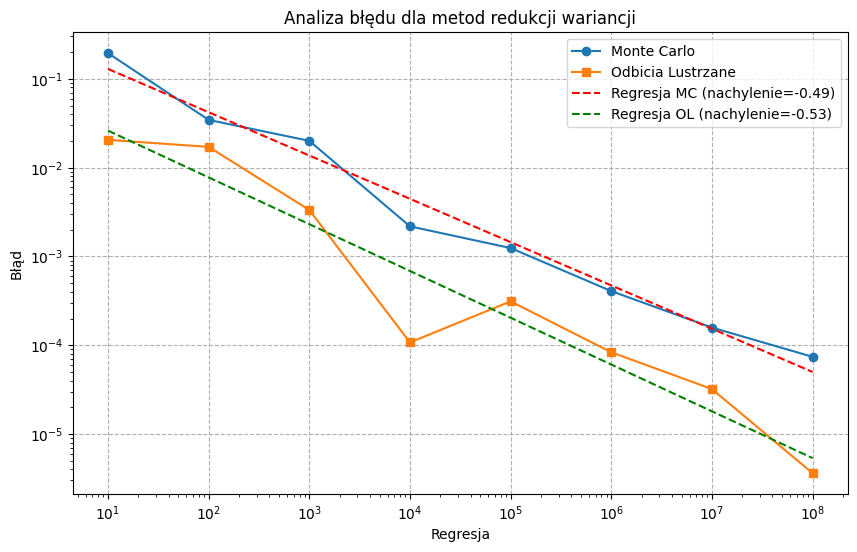

In [59]:
# Parametry
a = 0
b = 1
n_values = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000])
true_pi = np.pi

mc_errors = np.zeros(len(n_values))
av_errors = np.zeros(len(n_values))

for i, n in enumerate(n_values):
    mc_estimate = monte_carlo_integration(integrand, a, b, n)
    av_estimate = antithetic_variates_integration(integrand, a, b, n)
    
    mc_errors[i] = abs(mc_estimate - true_pi)
    av_errors[i] = abs(av_estimate - true_pi)

# Regresja liniowa w skali log-log
log_n_values = np.log(n_values)
log_mc_errors = np.log(mc_errors)
log_av_errors = np.log(av_errors)

slope_mc, intercept_mc, _, _, _ = linregress(log_n_values, log_mc_errors)
slope_av, intercept_av, _, _, _ = linregress(log_n_values, log_av_errors)

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.loglog(n_values, mc_errors, label='Monte Carlo', marker='o')
plt.loglog(n_values, av_errors, label='Odbicia Lustrzane', marker='s')

# Linie regresji
plt.loglog(n_values, np.exp(intercept_mc + slope_mc * log_n_values), 'r--', label=f'Regresja MC (nachylenie={slope_mc:.2f})')
plt.loglog(n_values, np.exp(intercept_av + slope_av * log_n_values), 'g--', label=f'Regresja OL (nachylenie={slope_av:.2f})')

plt.xlabel('Regresja')
plt.ylabel('Błąd')
plt.title('Analiza błędu dla metod redukcji wariancji')
plt.legend()
plt.grid(True, which="major", ls="--")
plt.show()


Przeprowadziliśmy analizę błędu metod Monte Carlo oraz odbić lustrzanych (Antithetic Variates) w celu szacowania wartości liczby pi. Otrzymane wyniki przedstawione są na wykresie, który ilustruje zależność błędu od liczby symulacji $(n)$ na skali $log-log$.

***Obserwacje ogólne***

1. Charakterystyka błędów: 
    - Dla obu metod zaobserwowano, że wraz ze wzrostem liczby symulacji (n) błąd maleje. Jest to zgodne z teoretycznymi podstawami metod Monte Carlo, gdzie wzrost liczby próbek prowadzi do bardziej precyzyjnych wyników.
2. Porównanie metod: 
    - Metoda odbić lustrzanych generalnie osiąga mniejsze błędy w porównaniu do klasycznej metody Monte Carlo.
    -Linie regresji dla obu metod pokazują, że metoda odbić lustrzanych charakteryzuje się bardziej stromym nachyleniem w porównaniu do klasycznej metody Monte Carlo. Wskazuje to na szybszy spadek błędu w zależności od liczby symulacji.


***Szczegółowe wnioski***
1. Skuteczność metody odbić lustrzanych:
    - Zastosowanie odbić lustrzanych skutkuje mniejszym błędem dla prawie każdej wartości n. Jest to widoczne na wykresie, gdzie pomarańczowa linia (Antithetic Variates) znajduje się poniżej niebieskiej linii (Monte Carlo).
    - Niższy poziom błędów może wynikać z redukcji wariancji próbki, co jest jedną z zalet stosowania odbić lustrzanych w metodzie Monte Carlo.

2. Analiza regresji:
    - Różnica w nachyleniach wskazuje na wyraźną korzyść z użycia odbić lustrzanych, szczególnie przy dużych liczbach symulacji.

3. Efektywność przy różnych wartościach n:
    - Przy małych liczbach symulacji (n ≤ 100) błędy obu metod są zbliżone, co może wynikać z dominującego wpływu losowości.
    - Dla większych wartości n (od 1000 do 1000000) metoda zmiennych przeciwstawnych wykazuje znaczną poprawę, co jest szczególnie widoczne przy bardzo dużych liczbach symulacji (n ≥ 100000).


***Podsumowanie***

Metoda odbić lustrzanych wykazuje się wyraźnie lepszą efektywnością w redukcji błędu w porównaniu do klasycznej metody Monte Carlo. Wykorzystanie tej metody jest szczególnie korzystne przy dużych liczbach symulacji, gdzie redukcja błędu jest bardziej zauważalna. Analiza regresji liniowej na skali $log-log$ potwierdza, że metoda zmiennych przeciwstawnych charakteryzuje się szybszym tempem spadku błędu. Zaleca się zatem stosowanie metody odbić lustrzanych w praktycznych zastosowaniach całkowania numerycznego metodą Monte Carlo, szczególnie gdy wymagana jest wysoka precyzja wyników.